Scikit-learn (also referred as sklearn) is a python library widely used for machine learning. It is characterized by a clean, uniform and streamlined API.

Machine Learning (ML)is a branch of artificial intelligence that aims at building systems that can learn from data, identify patterns and make decisions with minimal human intervention.

The objective here is to introduce the usage of a scikit-learn library for different stages of ML model building.

Let us understand the stages of this process with the following example

**Problem Statement:**
Engineers at XYZ custom cars now want to create a machine learning model that can predict the mpg of any car that comes to their garage. MPG refers to Miles per gallon.

**Solution:**
A linear regression model is to be made for this problem. The different stages to be followed in ML Model building is shown below:

An image showing the different stages to be followed in ML model building pipeline. The stages are as follows: Loading the data, preprocessing the data, training the model, testing the model, and evaluating the performance of the model.

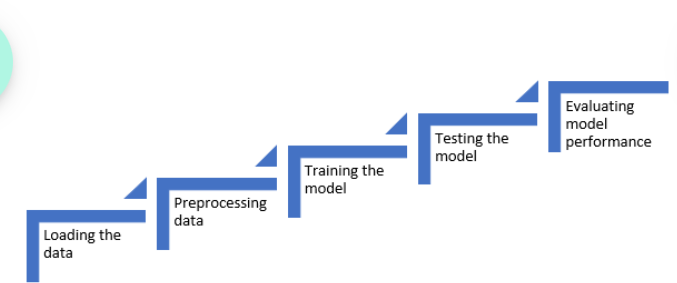





In [4]:
# Loading the Data
import pandas as pd

# URL for the raw Auto MPG dataset from UCI.
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

# Column names as described in the dataset documentation.
column_names = [
    "mpg", "cylinders", "displacement", "horsepower", "weight",
    "acceleration", "model_year", "origin", "name"
]

# Read the dataset using read_csv.
# - delim_whitespace=True is used because the data is space-delimited.
# - na_values=["?"] converts "?" in the horsepower field to NaN.

df = pd.read_csv(url, header=None, delim_whitespace=True,
                 names=column_names, na_values=["?"])

<ipython-input-4-cc87f32d5ffd>:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, header=None, delim_whitespace=True,


In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


# **Data Properties**
Let us use DataFrame.info() to get to know about the data properties.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


**Dropping null values**

It can be observed that the ‘horsepower’ attribute has some null values. The easiest approach is to remove the rows with null values as shown below:

In [6]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


**Predictors and Target**

The target variable is 'mpg' which has to be predicted. The predictors are the variables that are used to predict the target. Here, except name of the car, all the other variables are included as predictors.

In [7]:
#Creating matrix of predictors
X = df.iloc[:, 1:8]
#Creating target
y = df.iloc[:, 0]


Since the origin feature is a categorical variable,  get_dummies function can be used from Pandas to encode it as shown below:

In [8]:
X = pd.get_dummies(X)
X

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1
394,4,97.0,52.0,2130.0,24.6,82,2
395,4,135.0,84.0,2295.0,11.6,82,1
396,4,120.0,79.0,2625.0,18.6,82,1


From the below image, it can be observed that the categorical variable 'origin' has been encoded with 0s and 1s.

The data must be divided into two parts. First, a training set on which model can be trained. Second, a testing set on which the model can be validated.

The Sklearn library is used for this as shown below:

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train and y_train correspond to training predictors and target respectively. X_test and y_test correspond to testing predictors and target respectively. 'test_size = 0.2' represents that 20% of the data will be used as test set.

Since all the variables in the data are with different units of measurements and different scales, it would be a good idea to standardize them. A standard scaler performs this operation by transforming the columns such that the mean of every column or variable is 0 and standard deviation is 1.

In [10]:
# Applying standard sacler on the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit_transform(X_train)
scale.transform(X_test)

array([[-0.8576193 , -0.99758703, -0.76633972, -1.00888958, -0.38129265,
        -0.56648854, -0.72067354],
       [-0.8576193 , -0.51232051, -0.42292162, -0.09794779,  0.62553132,
         0.80165122, -0.72067354],
       [ 1.51266626,  1.52579886,  1.47908629,  1.76680366, -0.74087264,
        -1.11374445, -0.72067354],
       [-0.8576193 , -0.85200708, -1.08334104, -1.00888958, -0.30937665,
         1.62253508, -0.72067354],
       [-0.8576193 , -0.92964972, -0.97767393, -0.98507411,  0.87723732,
         1.07527918,  1.7445813 ],
       [ 0.32752348,  0.38056988, -0.37008807,  0.28309976,  0.58957333,
         0.52802327, -0.72067354],
       [-0.8576193 , -1.00729236, -1.16259137, -1.19584104,  1.16490131,
         1.07527918,  1.7445813 ],
       [-0.8576193 , -0.45408853, -0.97767393,  0.33073071,  2.24364128,
         1.07527918,  0.51195388],
       [ 0.32752348,  0.05058865, -0.23800419,  0.15449622,  0.33786733,
        -0.56648854, -0.72067354],
       [-0.8576193 , -0.9296

The linear regression model is used to build the model. A linear regression model uses the following equation:

y = B0 + B1*X1 + B2*X2 + _ _ _ _ + Bn*Xn

In this case, y refers to the target and X1,X2…..Xn refer to the predictors. B0 is the intercept  and B1,B2…..Bn are the coefficients.

Below code demonstrates the Linear Regression model building using sklearn library on the training data set.

In [11]:
# importing and fitting the model on training se
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

# Fitting the model on traing data:
reg.fit(X_train, y_train)
#Checking the coefficient(slope) and intercept.
# 'm' represent the cofficient and c represent the intercept.
m = reg.coef_
c = reg.intercept_
m,c

(array([-0.39034654,  0.01743605, -0.01026837, -0.00678792,  0.14137908,
         0.74133968,  1.12829334]),
 np.float64(-16.89106671405489))

In the next step, the linear regression model created is used for prediction against the training and testing data set.

In [12]:
# predicting the target: mpg aginst the predictors in the training data set
# predicted data store in y_pred_train

y_pred_train = reg.predict(X_train)

#Predicting the target: mpg against the predictors in the testing data set
# predicted data stored in y_pred_test

y_pred_test = reg.predict(X_test)

There are different metrics used to evaluate the performance of the model. Here the R Square score is used.

In [13]:
# prediction Accuracy in term of how close is the predicted value of target: mpg
# to the real value in training data set
from sklearn.metrics import r2_score
r2_s = r2_score(y_train, y_pred_train)
r2_s

0.8165058068251202

The r-squared score for training accuracy comes out to be 81%

Evaluating performance on test set

In [15]:
# prediction Accuracy in terms of how close the predicted value of target: mpg

# to the real value in testign data set

from sklearn.metrics import r2_score

r2_S = r2_score(y_test, y_pred_test)
r2_S


0.8363664681024057

Thus, scikit-learn helps to train, test and evaluate machine learning models.  More about scikit-learn and machine learning will be covered in Explore Machine Learning course.